# Cálculo diferencial en varias variables (I)

Unha das funcionalindades máis importantes do módulo **Sympy** é as ferramentas das que dispón para o cálculo de derivadas, xa se traten de derivadas ordinarias (para expresións que dependen dunha única variable) como de derivadas parciais (para expresións definidas a partir de varias variables). Nesta práctica, estudaremos como calcular derivadas parciais de primeira orde, derivadas direccionais usando o vector gradiente e a relación entre o gradiente e as curvas de nivel dunha función de dúas variables.

### Obxectivos:

- Cálculo de derivadas ordinarias nunha variable
- Cálculo de derivadas parciais de primeira orde
- Cálculo do gradiente e de derivadas direccionais
- Representación gráfica do gradiente e das curvas de nivel

Para dispoñer do módulo **Sympy** e importalo para o resto do guión de prácticas, usaremos:

In [1]:
import sympy as sp

## Cálculo de derivadas ordinarias nunha variable
Para calcular derivadas, o módulo **Sympy** ten a función `sp.diff` no que se debe especificar como argumentos de entrada tanto a expresión matemática como a variable con respecto á que se deriva. Por exemplo, para calcular $f'(x)$ sendo $f(x)=x^2\cos(2x)$ empregaríamos:

In [2]:
x = sp.Symbol('x', real=True) # define a variable simbólica x
f = sp.Lambda((x), x**2*sp.cos(2*x)) # define a función a derivadar
df = sp.diff(f(x),x) # cálculo da derivada
display(df)

-2*x**2*sin(2*x) + 2*x*cos(2*x)

Para calcular a segunda derivada ou a derivada $n$-ésima dunha expresión, unicamente hai que indicarlle o número de derivadas que se quere realizar engadindo este valor como argumento opcional. Ademais, as funcións dunha variable poder conter parámetros constantes. Por exemplo, para calcular as derivadas sucesivas da función $f(x)=x^2+ax+b$ sendo $a$, $b$ dous parámetros constantes:

In [3]:
a, b = sp.symbols('a b', real=True) # define as variables simbólicas a, b
f = sp.Lambda((x), x**2+a*x+b) # define a función a derivadar
df = sp.diff(f(x),x,1) # cálculo da primeira derivada
display(df)
d2f = sp.diff(f(x),x,2) # cálculo da primeira derivada
display(d2f)
d3f = sp.diff(f(x),x,3) # cálculo da primeira derivada
display(d3f)

a + 2*x

2

0

## Cálculo de derivadas parciais de primeira orde
O cálculo  de derivadas parciais de funcións de varias variables faise do mesmo xeito que no caso de derivadas ordinarias, tendo coidado de especificar a variable con respecto a que se está a derivar:

In [4]:
x, y = sp.symbols('x y', real=True) # define as variables simbólicas x, y
f=sp.Lambda((x,y), x/((x+y)*y))
dfx = sp.diff(f(x,y),x)
display(sp.factor(dfx)) # Emprégase sp.factor para simplificar a expresión das derivadas
dfy = sp.diff(f(x,y),y)
display(sp.factor(dfy))

(x + y)**(-2)

-x*(x + 2*y)/(y**2*(x + y)**2)

Podemos comprobar que as expresións obtidas coinciden coa definición baseada no cálculo de límites de cocientes incrementais ao variar cada unha das variables $x$ e $y$:

In [5]:
h = sp.Symbol('h', real=True) # define a variable simbólica h
dfx_def = sp.limit((f(x+h,y)-f(x,y))/h,h,0)
display(sp.factor(dfx_def))  # Emprégase sp.factor para simplificar a expresión das derivadas
dfy_def = sp.limit((f(x,y+h)-f(x,y))/h,h,0)
display(sp.factor(dfy_def))

(x + y)**(-2)

-x*(x + 2*y)/(y**2*(x + y)**2)

### **Exercicio 6.1** 
Calcula todas as derivadas parciais de primeira orde da función de catro variables $f(x,y,z,u)=\displaystyle\frac{y+x-z}{u-x^3}$.

In [6]:
# O TEU CÓDIGO AQUÍ

## Cálculo do vector gradiente
Posto que o módulo **Sympy** é capaz de calcular as derivadas parciais de primeira orde, tamén podemos calcular o vector gradiente. Para evitar complicacións na implementación (e evitar o uso das clases de obxectos e métodos que están implementados no submódulo `sp.vector`), imos a definir a noso propio procedemento de calcular gradientes (almacenando as compoñentes do vector gradiente nunha lista):

In [7]:
def gradient(expr, varlist):
    return [sp.diff(expr,var) for var in varlist] # cálculo do gradiente almacenado nunha lista

Deste xeito, o vector gradiente calcúlase e almacénase nunha lista, onde cada derivada parcial se garda na lista seguindo a orde das variables con respecto á que se deriva. Por exemplo no caso de $f(x,y)=3x^2-5y^2$, obtemos que $$
\nabla f(x,y)=
\begin{pmatrix}
6x\\
-10y
\end{pmatrix}.
$$

In [8]:
x, y = sp.symbols('x y', real=True) # define as variables simbólicas x, y
f = sp.Lambda((x,y), 3*x**2-5*y**2)
grad_f = gradient(f(x,y),(x,y)) # cálculo do gradiente de f usando as variables (x,y)
display(grad_f)

[6*x, -10*y]

> **Nota**: Nesta implementación, estamos a almacenar cada unha das compoñentes do vector gradiente como os elementos dunha lista. Nótese que poderíamos empregar unha implementación alternativa usando os obxectos `sp.vector` que están dispoñibles en **Sympy** ou `numpy.array` que xa se empregaron no módulo **Numpy**.

### Cálculo de derivadas direccionais
Como xa revisamos nas clases de pizarra, a derivada direccional na dirección do vector unitario $\vec{u}$ pódese calcular mediante o produto escalar do gradiente polo vector unitario, isto é, $D_{\vec{u}}f=\nabla f\cdot\vec{u}$. Posto que nesta práctica estamos a usar listas para almacenar os vectores, debemos implementar tamén unha función **Python** para calcular o produto escalar de dúas listas (non se podería usar a función `np.dot` xa que non se está a traballar con obxectos da clase `np.array`):

In [9]:
def dot(u, v):
    return sum([a*b for a,b in zip(u, v)]) # cálculo do produto interior de dous vectores almacenados en listas

Agora tendo en conta esta función `dot`, o cálculo de $D_{\vec{u}}f=\nabla f\cdot\vec{u}$ é inmediato. Véxamos cun exemplo onde se calcular a derivada direccional de $f(x,y)=3x+2y$ na dirección do vector unitario $\vec{u}=(-1,1)^{t}/\sqrt{2}$:

In [10]:
f = sp.Lambda((x,y),3*x+2*y)
u = [-1/sp.sqrt(2), 1/sp.sqrt(2)] # vector unitario que define a dirección
Dfu = dot(gradient(f(x,y),(x,y)),u)
display(Dfu)

-sqrt(2)/2

### **Exercicio 6.2** 
Calcula a derivada direccional da función $f(x,y,z,u)=\displaystyle\frac{y+x-z}{u-x^3}$ con respecto á dirección indicada polo vector $\vec{v}=(1,0,-1,1)^t/\sqrt{3}$ no punto $(2,1,-2,1)$.

In [11]:
# O TEU CÓDIGO AQUÍ

## Representación gráfica de gradientes e curvas de nivel
Cando temos en conta as curvas de nivel e a súa relación cos gradientes da función que se está a estudar, é doado comprobar (usando derivación implícita) que os vectores tanxentes á curva de nivel son perpediculares ao vector gradiente da funcion que define as curvas de nivel. Para ilustrar isto, consideremos a función de dúas variables:
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right),\qquad (x,y)\in[-\pi,\pi]\times[-\pi,\pi].
$$
Para iso, definimos a función co módulo **Sympy** e calculamos o seu gradiente:

In [12]:
x, y = sp.symbols('x y', real=True)
f = sp.Lambda((x,y),sp.sin(x)*sp.cos(x*y**2/10))
grad_f = gradient(f(x,y),(x,y))
display(grad_f)

[-y**2*sin(x)*sin(x*y**2/10)/10 + cos(x)*cos(x*y**2/10),
 -x*y*sin(x)*sin(x*y**2/10)/5]

Imos primeiro a representar as curvas de nivel, tal e como se fixo na práctica 4, primeiro importamos os módulos de **Numpy** e **Matplotlib**:

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Nembargantes, antes de poder representar graficamente debemos ser capaces de traducir os obxectos que dependen do módulo **Sympy** a obxectos do módulo **Numpy**, que serán os que usaremos para a representación de curvas de nivel e dos vectores gradiente. Para isto, empregaremos o método `sp.lambdify`:

In [15]:
F = sp.lambdify((x,y),f(x,y),"numpy") # función numpy coa expresión de f(x,y)
grad_F = sp.lambdify((x,y),grad_f,"numpy") # función numpy coa expresión vectorial de grad(f)

Para representar as curvas de nivel e o campo de vectores do gradiente é preciso crear unha nube de puntos sobre a que pintar os valores da función. Usaremos dúas nubes de puntos diferentes para cada caso:

In [16]:
N = 50  # 50 puntos en cada dirección dos eixes cartesianos
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(x, y)
Values = F(X,Y)

Ng = 10  # 10 puntos en cada dirección dos eixes cartesianos
xg = np.linspace(-np.pi, np.pi, Ng)
yg = np.linspace(-np.pi, np.pi, Ng)
Xg, Yg = np.meshgrid(xg, yg)
Values_grad=grad_F(Xg,Yg)

E usando a función `contour`  e `quiver` obtense a representación gráfica das curvas de nivel e o gradiente:

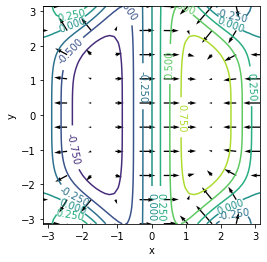

In [17]:
p = plt.contour(X, Y, Values) # Representación gráfica das curvas de nivel
plt.clabel(p) # Engádese o valor numérico a cada curva de nivel
plt.quiver(Xg, Yg, Values_grad[0], Values_grad[1]) # Representación gráfica do campo de vectores gradiente
# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

### **Exercicio 6.3** 
Define unha función de dúas variables onde todas as súas curvas de nivel sexan rectas. Representa graficamente as curvas de nivel e comproba que o gradiente ven dado por un campo de vectores que posúen a mesma dirección. Verificanto as condicións anteriores, constrúe exemplos nos que:
- O gradiente é constante para todos os puntos
- O gradiente ten a mesma dirección en todos os puntos pero varía o módulo dos vectores en cada punto

In [18]:
# O TEU CÓDIGO AQUÍ